In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [83]:
df = pd.read_csv('CAR DETAILS.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [84]:
df.shape

(4340, 8)

Checking the types of all data

In [85]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

Checking the nall values

In [86]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

Checking the info of the data

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


Checking the value count all of the data

In [88]:
df['name'].value_counts()

Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: name, Length: 1491, dtype: int64

In [89]:
df['year'].value_counts()

2017    466
2015    421
2012    415
2013    386
2014    367
2018    366
2016    357
2011    271
2010    234
2019    195
2009    193
2008    145
2007    134
2006    110
2005     85
2020     48
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64

In [90]:
df['selling_price'].value_counts()

300000     162
250000     125
350000     122
550000     107
600000     103
          ... 
2100000      1
828999       1
1119000      1
746000       1
865000       1
Name: selling_price, Length: 445, dtype: int64

In [91]:
df['km_driven'].value_counts()

70000     236
80000     228
50000     222
120000    220
60000     215
         ... 
19107       1
32077       1
6480        1
118400      1
112198      1
Name: km_driven, Length: 770, dtype: int64

In [92]:
df['fuel'].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [93]:
df['seller_type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [94]:
df['transmission'].value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

In [95]:
df['owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

Converting price in Lacks rupees - selling_price/100000<br>
Converting km_driven in Lacks of km - km_driven/100000

In [96]:
df['selling_price_lacks'] = df['selling_price']/100000
df['km_driven_lacks'] = df['km_driven']/100000
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,selling_price_lacks,km_driven_lacks
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,0.60,0.70
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,1.35,0.50
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,6.00,1.00
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,2.50,0.46
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,4.50,1.41


In [97]:
df1 = df.copy()

df1 = df1.drop(['selling_price','km_driven'],axis=1)

In [98]:
from sklearn.preprocessing import LabelEncoder

In [155]:
le = LabelEncoder()

df1['fuel'] = le.fit_transform(df1['fuel'])
df1['seller_type'] = le.fit_transform(df1['seller_type'])
df1['transmission'] = le.fit_transform(df1['transmission'])
df1['owner'] = le.fit_transform(df1['owner'])
df1.head()

,name,year,fuel,seller_type,transmission,owner,selling_price_lacks,km_driven_lacks
0,Maruti 800 AC,2007,4,1,1,0,0.60,0.70
1,Maruti Wagon R LXI Minor,2007,4,1,1,0,1.35,0.50
2,Hyundai Verna 1.6 SX,2012,1,1,1,0,6.00,1.00
3,Datsun RediGO T Option,2017,4,1,1,0,2.50,0.46
4,Honda Amaze VX i-DTEC,2014,1,1,1,2,4.50,1.41


Cuting the first word only (car brand) from name column<br>
And Creating new column

In [101]:
df['brand_name'] = df.name.apply(lambda x : ' '.join(x.split(' ')[:2]))
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,selling_price_lacks,km_driven_lacks,brand_name
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,0.60,0.70,Maruti 800
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,1.35,0.50,Maruti Wagon
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,6.00,1.00,Hyundai Verna
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,2.50,0.46,Datsun RediGO
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,4.50,1.41,Honda Amaze


Droping the name column to the dataset

In [102]:
df.drop('name',axis=1,inplace=True)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,selling_price_lacks,km_driven_lacks,brand_name
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,0.60,0.70,Maruti 800
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,1.35,0.50,Maruti Wagon
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,6.00,1.00,Hyundai Verna
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2.50,0.46,Datsun RediGO
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,4.50,1.41,Honda Amaze


### Performing some EDA on the DataSet

#### Classify on the basis of fuel used

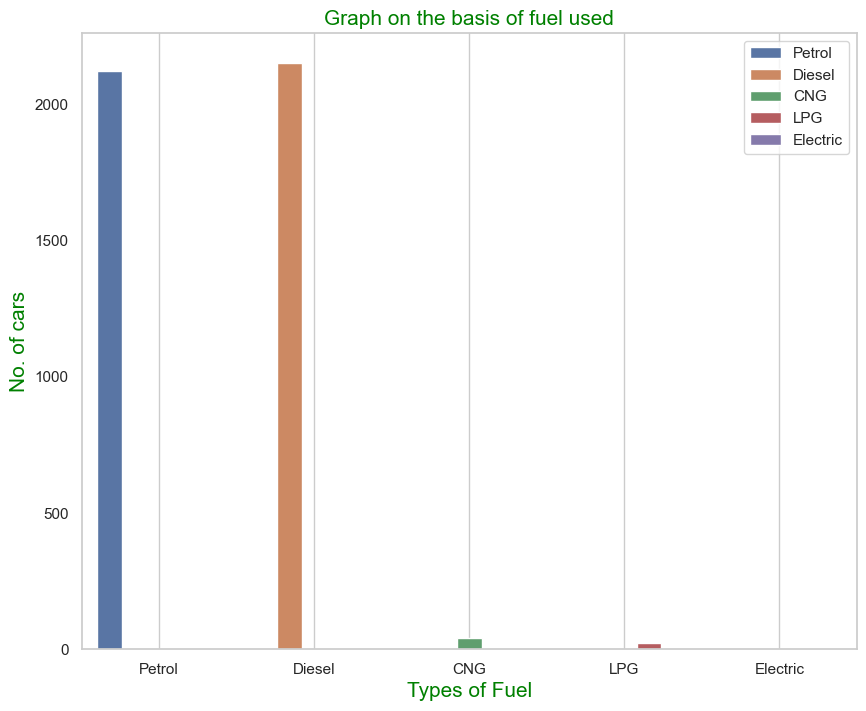

In [103]:
plt.figure(figsize=(10,8))
sns.countplot(data = df,x='fuel',hue='fuel')
plt.xlabel('Types of Fuel',color='green',size=15)
plt.ylabel('No. of cars',color='green',size=15)
plt.title('Graph on the basis of fuel used',color='green',size=15)
plt.legend()
plt.grid()
plt.show()

#### Classify on the basis of owner type

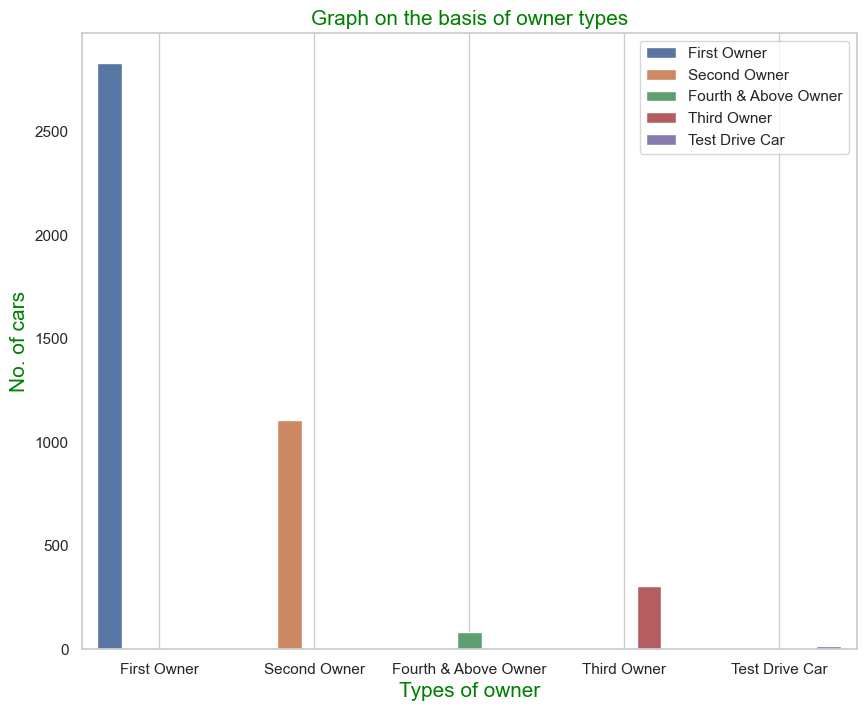

In [104]:
plt.figure(figsize=(10,8))
sns.countplot(data = df,x='owner',hue='owner')
plt.xlabel('Types of owner',color='green',size=15)
plt.ylabel('No. of cars',color='green',size=15)
plt.title('Graph on the basis of owner types',color='green',size=15)
plt.legend()
plt.grid()
plt.show()

### Top 10 high price cars

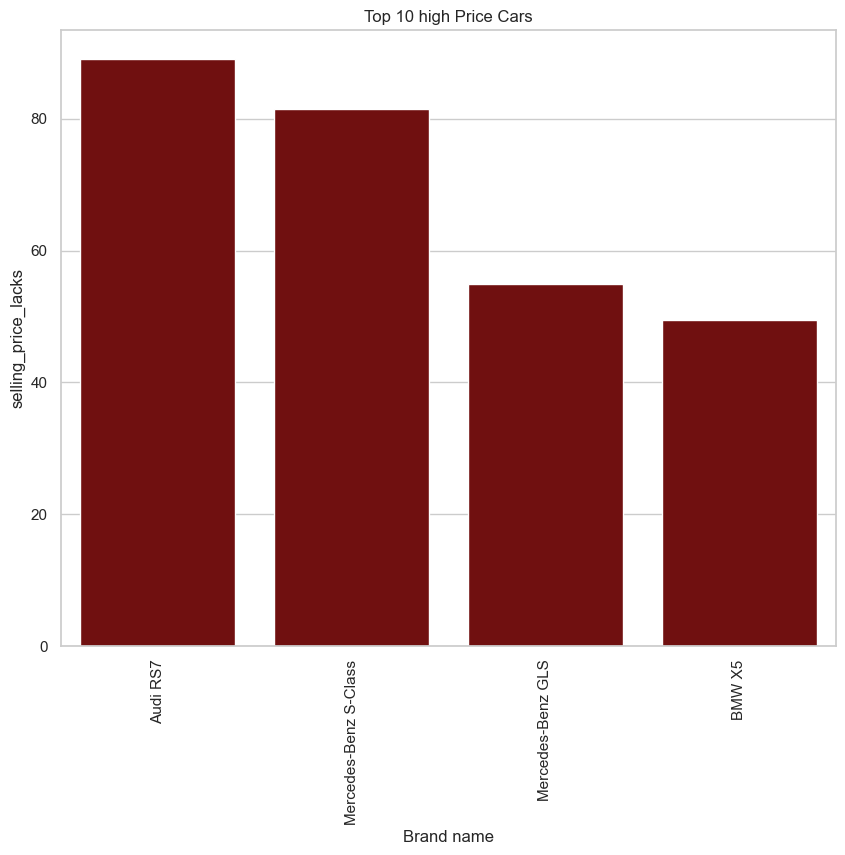

In [105]:
r1 = df[['brand_name','selling_price_lacks']].sort_values(by='selling_price_lacks',ascending=False).head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=r1,x='brand_name',y='selling_price_lacks',color='maroon')
plt.xlabel('Brand name')
plt.ylabel('selling_price_lacks')
plt.title('Top 10 high Price Cars')
plt.xticks(rotation=90)
plt.show()

### Top 10 Low Price cars

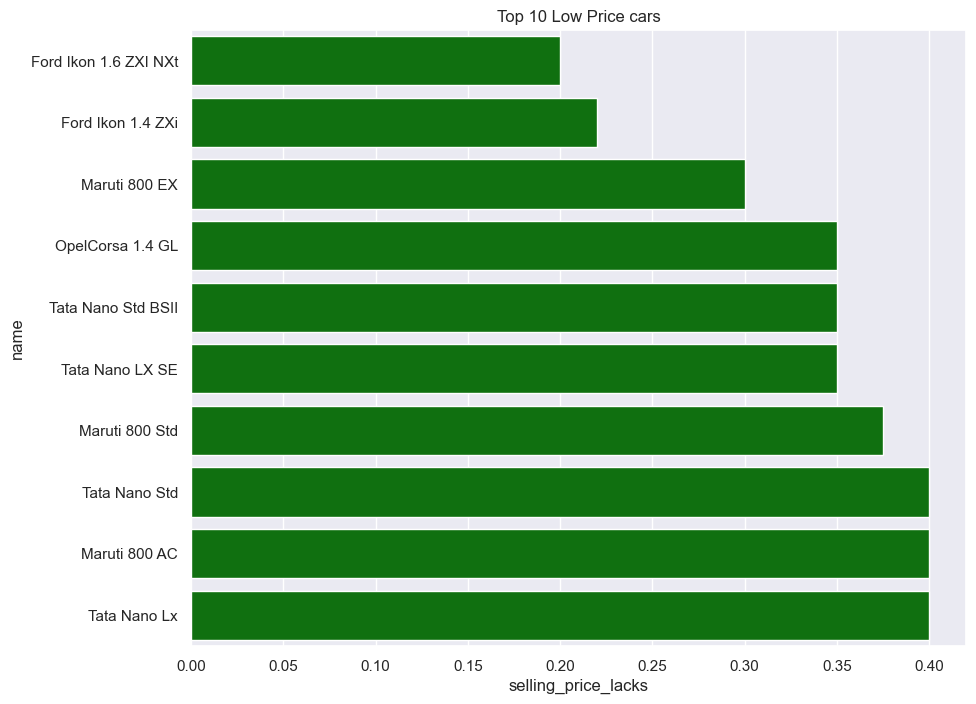

In [106]:
r2 = df1[['name','selling_price_lacks']].sort_values(by='selling_price_lacks').head(10)
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(data=r2,x='selling_price_lacks',y='name',color='green')
plt.title('Top 10 Low Price cars')
sns.set_style('whitegrid')
plt.show()

### Classify on the basis of transmission and fuel type

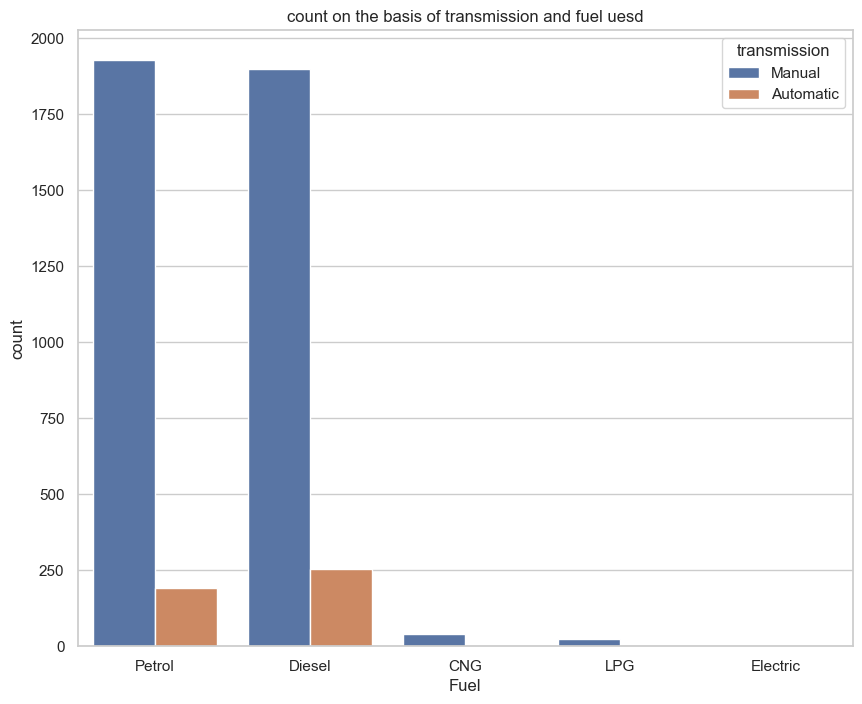

In [107]:
r3 = df[['transmission','fuel']]
sns.countplot(data=r3,x='fuel',hue='transmission')
plt.xlabel('Fuel')
plt.title('count on the basis of transmission and fuel uesd')
plt.show()

### Classify on the basis of seller type

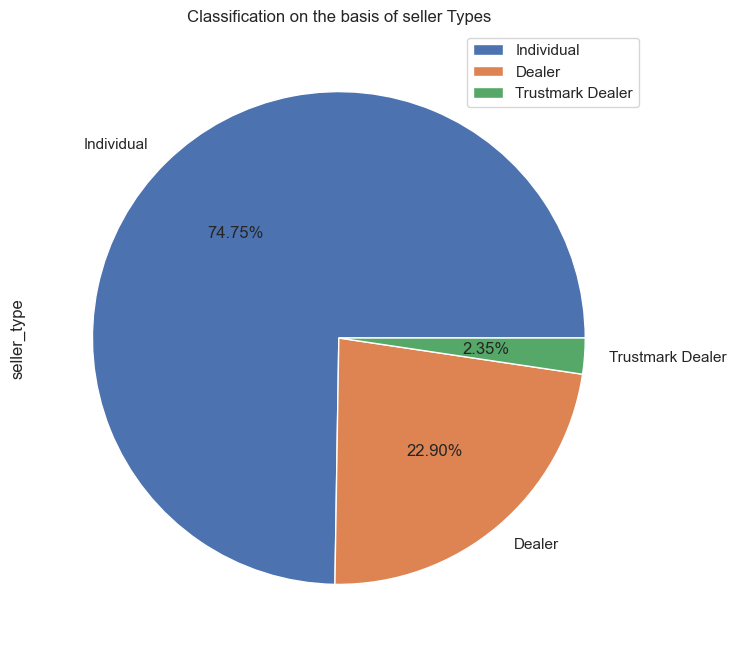

In [108]:
r3 = df['seller_type'].value_counts()
r3.plot.pie(autopct='%.2f%%')
plt.title('Classification on the basis of seller Types')
plt.legend()
plt.show()

#### Now trying to find out the sales classified by brand

### Top 5 car with max driven km

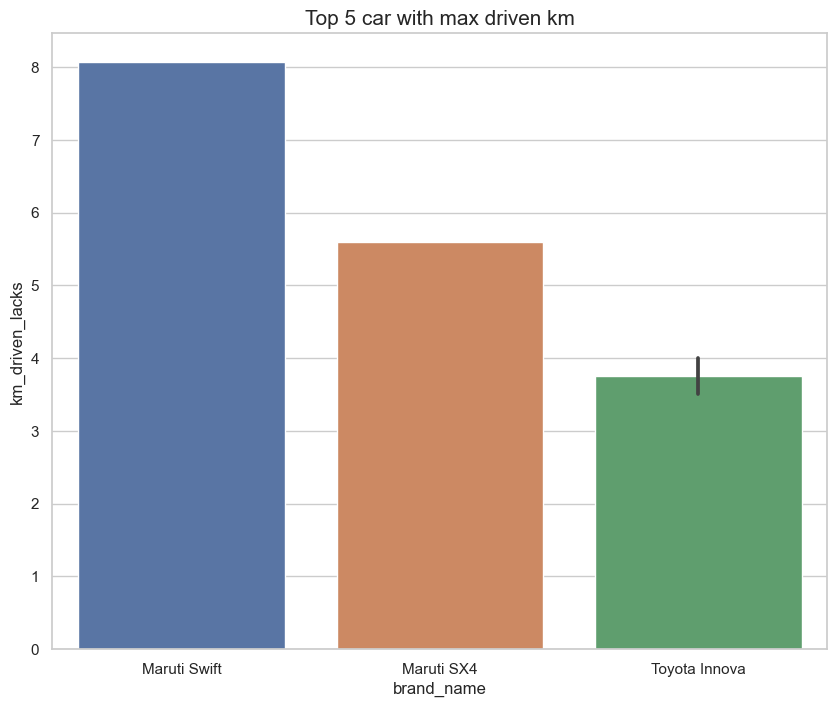

In [109]:
r4 = df[['brand_name','km_driven_lacks']].sort_values(by='km_driven_lacks',ascending=False).head()
sns.barplot(data=r4,x='brand_name',y='km_driven_lacks')
plt.title('Top 5 car with max driven km',size=15)
plt.show()

### Top 5 car with min driven km

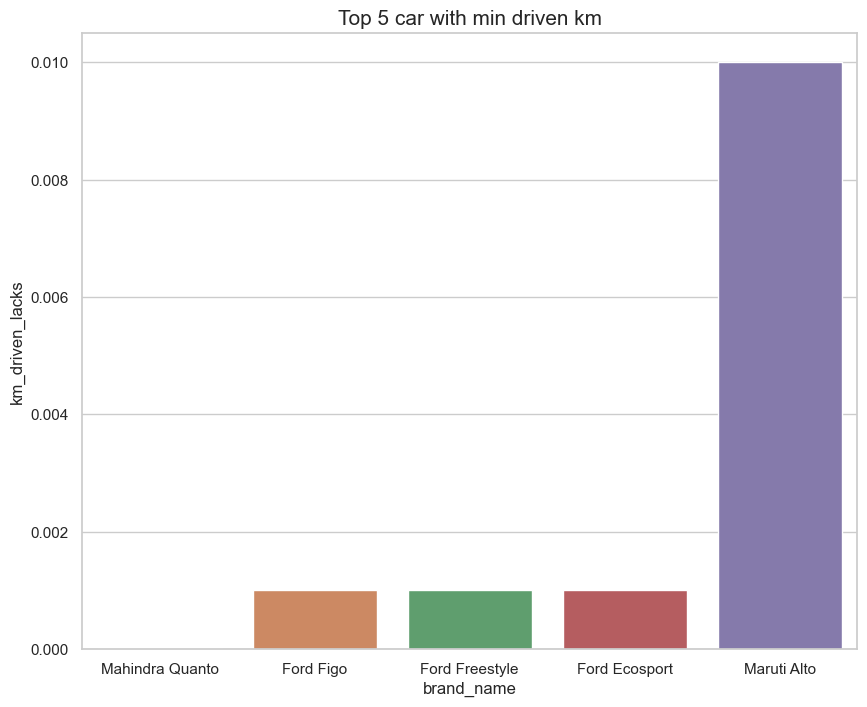

In [110]:
r5 = df[['brand_name','km_driven_lacks']].sort_values(by='km_driven_lacks',ascending=True).head()
sns.barplot(data=r5,x='brand_name',y='km_driven_lacks')
plt.title('Top 5 car with min driven km',size=15)
plt.show()

### Classification on the basis of owner types with avg car price

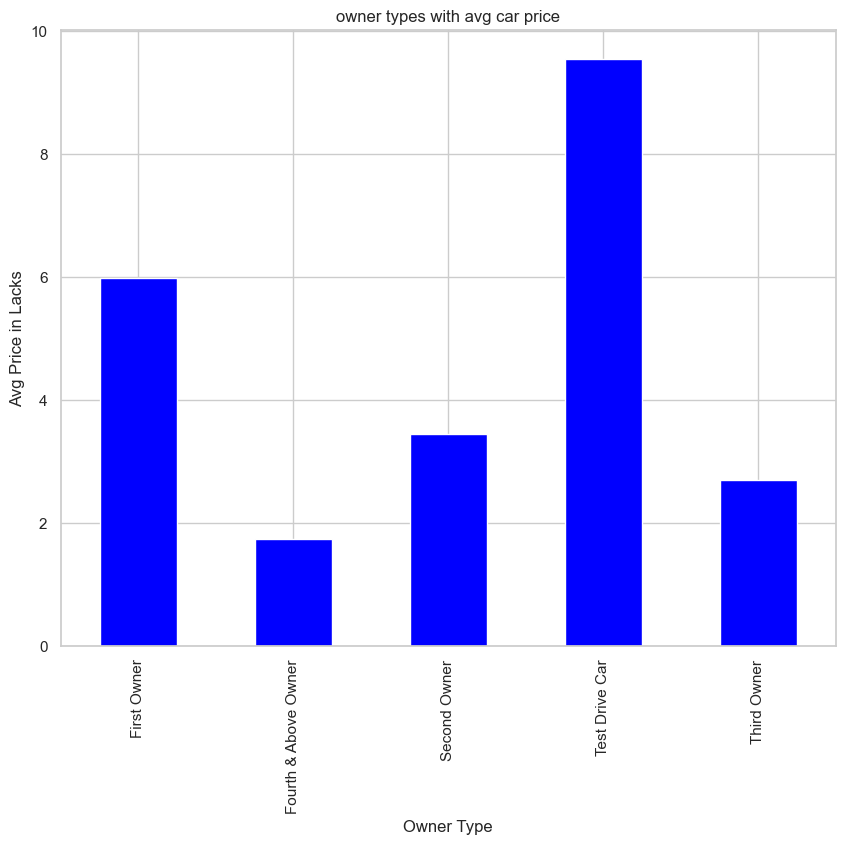

In [111]:
r6 = df[['owner','selling_price_lacks']].groupby(['owner'])['selling_price_lacks'].mean()
r6.plot.bar(color='blue')
plt.xlabel('Owner Type')
plt.ylabel('Avg Price in Lacks')
plt.title('owner types with avg car price')
plt.show()

### Heatmap for Checking corelation

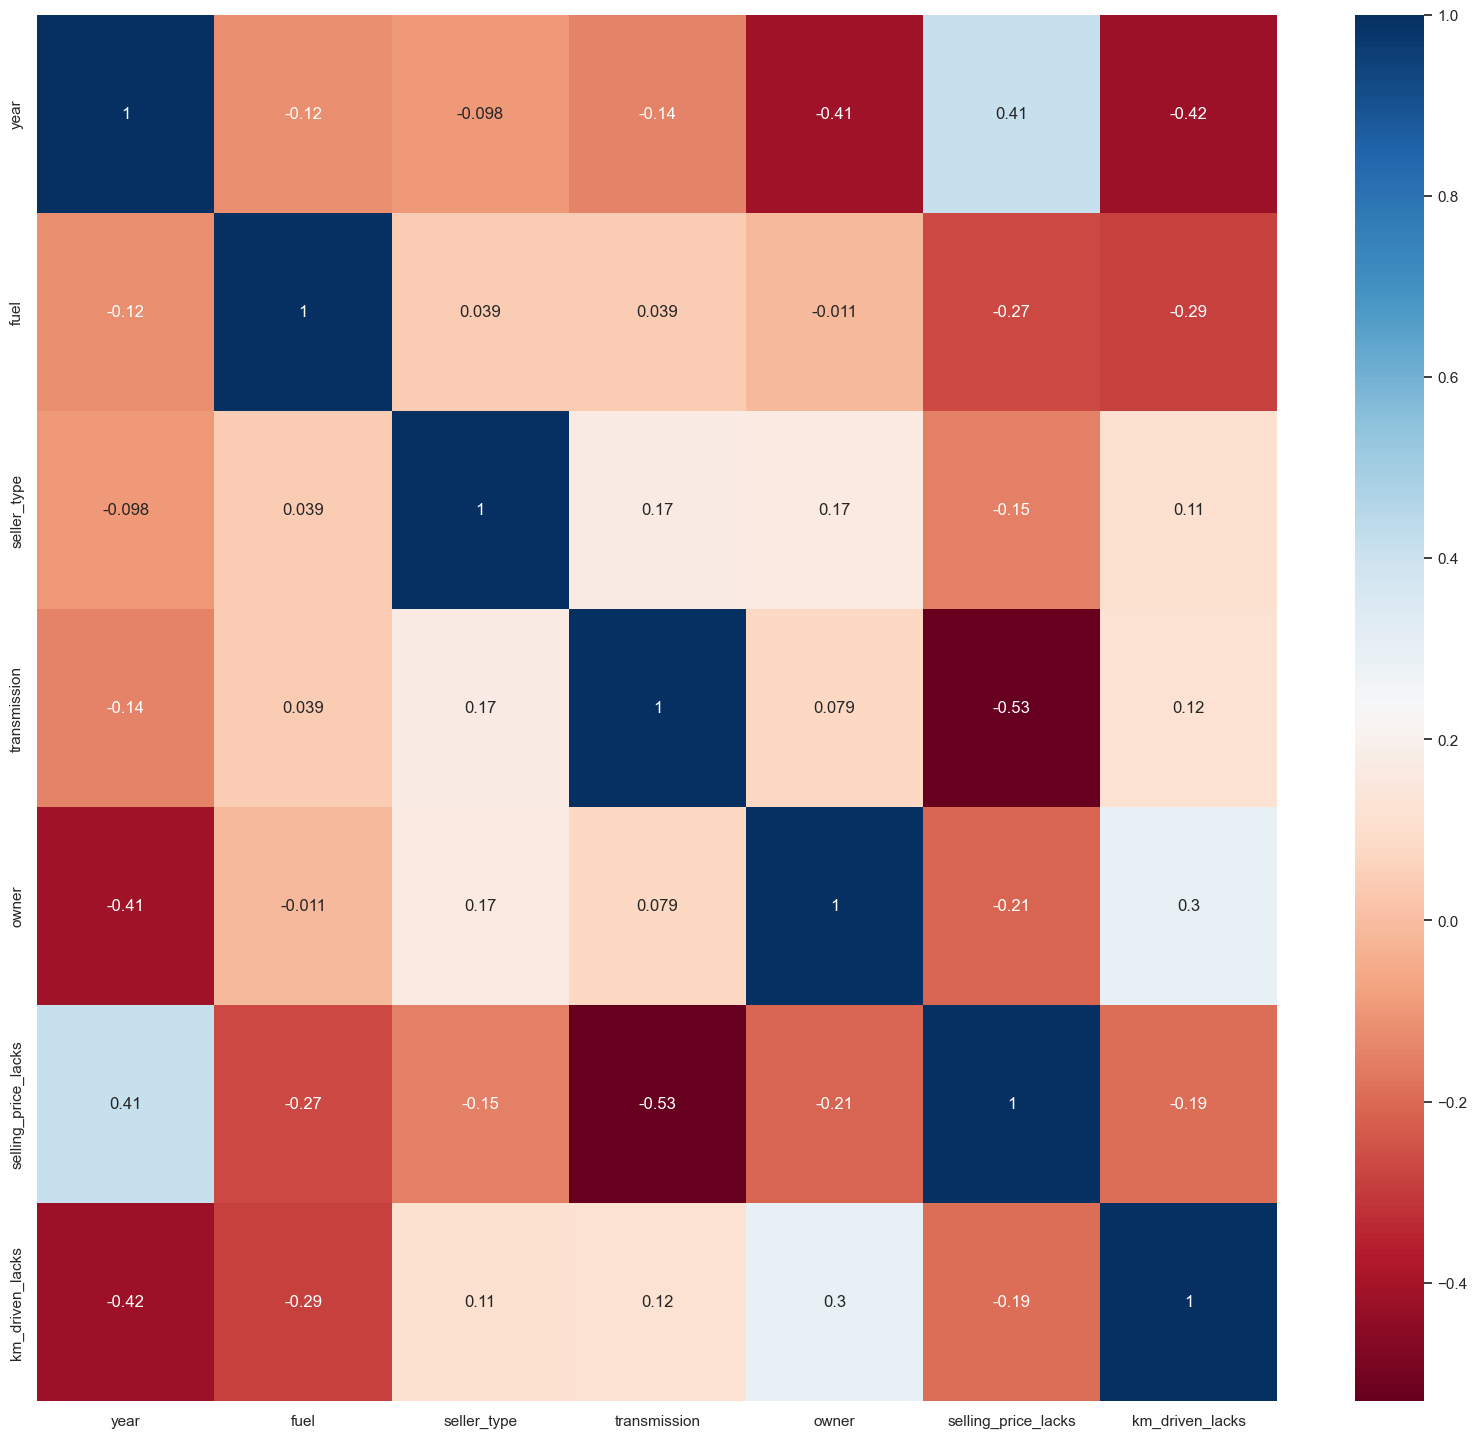

In [112]:
corr = df1.corr()
plt.figure(figsize=(20,18))
sns.heatmap(data=corr, annot=True,cmap='RdBu')
plt.show()

### Prepare Data for Machine Learning Model
#### Selecting Independent x and y variables

In [113]:
x = df1.drop(['selling_price_lacks','name'],axis=1)
y = df1['selling_price_lacks']
print(x.shape)
print(y.shape)

(4340, 6)
(4340,)


### Spliting the Data into train and test

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3038, 6)
(1302, 6)
(3038,)
(1302,)


In [116]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [117]:
def cal_eval_met(y_test,ypred):
    mae = mean_absolute_error(y_test,ypred)
    mse = mean_squared_error(y_test,ypred)
    rmse = np.sqrt(mean_squared_error(y_test,ypred))
    r2s_score = r2_score(y_test,ypred)
    
    print('mae',mae)
    print('mse',mse)
    print('rmse',rmse)
    print('r2_score',r2s_score)
    
def mscore(model):
    print('Training Score',model.score(x_train,y_train))
    print('Testing Score',model.score(x_test,y_test))

### Importing ML (Machine Learning) Models 

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [146]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [127]:
ypred_lr = lr.predict(x_test)
print(ypred_lr)

[8.23225893 5.58843045 4.97984428 ... 1.45660303 4.71888497 0.71993352]


### Checking MAE, MSE, R2_score And Model score

In [128]:
cal_eval_met(y_test,ypred_lr)

mae 2.3341113241573987
mse 19.180968758083537
rmse 4.37960828820153
r2_score 0.451790935545081


### Checking Model Score

In [129]:
mscore(lr)

Training Score 0.44692370778028323
Testing Score 0.451790935545081


#### Applying KNN Model

In [130]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [131]:
ypred_knn = knn.predict(x_test)
print(ypred_knn)

[12.7       5.86      3.       ...  1.78      5.35      1.849998]


### Checking MAE, MSE, R2_score And Model score

In [132]:
cal_eval_met(y_test,ypred_knn)

mae 1.761913827956989
mse 13.674847395180352
rmse 3.697951783782524
r2_score 0.6091607576433675


#### Checking Model Score

In [133]:
mscore(knn)

Training Score 0.7129629905995271
Testing Score 0.6091607576433675


### Applying Decision Tree Regressor Model

In [134]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [135]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[11.25   5.925  3.25  ...  1.78   3.3    2.5  ]


In [136]:
cal_eval_met(y_test,ypred_dt)

mae 1.8038231361146746
mse 16.394861671136674
rmse 4.0490568866264
r2_score 0.5314203421131236


In [137]:
mscore(dt)

Training Score 0.9610569438575216
Testing Score 0.5314203421131236


### Applying Bagging Ensemble Model

In [138]:
bagg = BaggingRegressor(base_estimator=dt)
bagg.fit(x_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor())

In [139]:
ypred_bagg = bagg.predict(x_test)
print(ypred_bagg)

[11.06625     5.95559524  3.80392857 ...  1.77342208  3.62464286
  2.3       ]


In [140]:
cal_eval_met(y_test,ypred_bagg)

mae 1.7133639694909055
mse 12.472514731839668
rmse 3.531644762973715
r2_score 0.6435244893634251


In [141]:
mscore(bagg)

Training Score 0.9073300654578941
Testing Score 0.6435244893634251


### Checking the Best Model

In [142]:
best_model = pd.DataFrame({'Model Name':['LinearRegression','KNeighborsRegressor','DecisionTreeRegressor','BaggingRegressor'],
                          'Training Score':[lr.score(x_train,y_train),knn.score(x_train,y_train),dt.score(x_train,y_train),bagg.score(x_train,y_train)],
                          'Testing Score':[lr.score(x_test,y_test),knn.score(x_test,y_test),dt.score(x_test,y_test),bagg.score(x_test,y_test)]})
best_model

,Model Name,Training Score,Testing Score
0,LinearRegression,0.446924,0.451791
1,KNeighborsRegressor,0.712963,0.609161
2,DecisionTreeRegressor,0.961057,0.531420
3,BaggingRegressor,0.907330,0.643524


### So The Best Model is Linear Regression

#### Saving the best model(Linear Regression)

In [144]:
import pickle

In [148]:
pickle.dump(lr,open('Linear_Regression.pkl','wb'))
loaded_model = pickle.load(open('Linear_Regression.pkl','rb'))

In [149]:
res = loaded_model.score(x_train,y_train)
print(res)

0.44692370778028323


#### Creating a random dataset by selecting20 data and checking best Model on it

In [150]:
rand_20 = df1[340:360]
rand_20.to_csv('rand_20.csv')
rand_20

,name,year,fuel,seller_type,transmission,owner,selling_price_lacks,km_driven_lacks
340,Tata Nano STD,2013,4,1,1,1,0.55000,0.25
341,Hyundai Grand i10 Sportz,2016,4,1,1,0,3.50000,0.25
342,Hyundai Grand i10 1.2 CRDi Asta,2019,1,1,1,0,7.55000,0.08
343,Maruti Ertiga SHVS VDI,2017,1,1,1,0,7.20000,0.60
344,Mahindra Bolero SLX,2006,1,1,1,4,2.29999,2.00
345,Mahindra Scorpio S7 140 BSIV,2018,1,1,1,0,11.00000,0.20
346,Volkswagen Polo Petrol Comfortline 1.2L,2013,4,1,1,0,4.00000,1.00
347,Hyundai Xcent 1.1 CRDi Base,2015,1,1,1,2,3.50000,0.70
348,Chevrolet Beat Diesel PS,2012,1,0,1,0,1.59000,0.68
349,Maruti Swift ZXi BSIV,2017,4,0,1,0,5.50000,0.38


In [152]:
x1 = rand_20.drop(['selling_price_lacks','name'],axis=1)
y1 = rand_20['selling_price_lacks']
print(x1.shape,y1.shape)

(20, 6) (20,)


In [153]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15, 6)
(5, 6)
(15,)
(5,)


#### Applying the saved best Model

In [154]:
result = loaded_model.score(x_train,y_train)
print(result)

-1.3047691088206528
